In [1]:
import numpy as np
from myplotstyle import plt, cmc, legend_ordered

from easyquery import Query, QueryMaker
import SAGA
from SAGA import ObjectCuts as C
from SAGA import HostCuts as H

In [2]:
print(SAGA.__version__)
saga = SAGA.QuickStart()

3.0.0
SAGA `shared_dir` set to /home/yymao/Dropbox/Work/SAGA
SAGA `local_dir`  set to /home/yymao/Documents/Work/Data/SAGA


In [3]:
hosts = saga.host_catalog.load(include_stats=True, query="paper3")

In [4]:
lg_pairs = Query(QueryMaker.isin("NEAREST_MW", hosts["HOSTID"]), "NEARBY_MW_COUNT_1 == 1").filter(hosts)
lg_singles = Query(QueryMaker.isin("NEAREST_MW", hosts["HOSTID"], invert=True), "NEARBY_MW_COUNT_1 == 1").filter(hosts)
regular = Query("NEARBY_MW_COUNT_1 != 1").filter(hosts)

assert set(lg_pairs["HOSTID"]) | set(lg_singles["HOSTID"]) | set(regular["HOSTID"]) == set(hosts["HOSTID"])

In [5]:
MK_MW = -24.0
MK_M31 = -24.7
Mstar_MW = 10.78
Mstar_M31 = 11.01

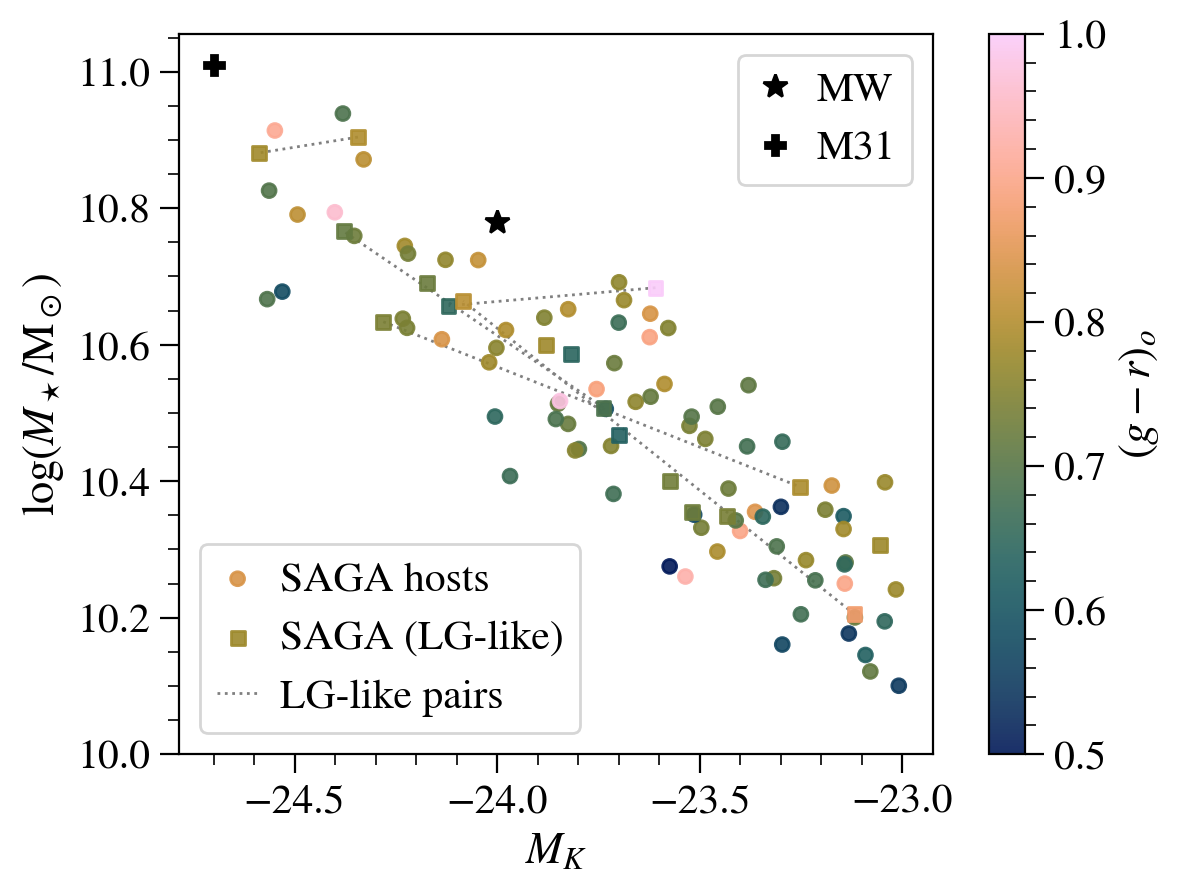

In [6]:
cs = plt.scatter(regular["K_ABS"], regular["log_sm"], c=regular["gr"], cmap=cmc.batlow, vmin=0.5, vmax=1, label="SAGA hosts", alpha=0.9, zorder=20)
plt.scatter(lg_singles["K_ABS"], lg_singles["log_sm"], c=lg_singles["gr"], marker="s", cmap=cmc.batlow, vmin=0.5, vmax=1, label="SAGA (LG-like)", alpha=0.9, zorder=80)
plt.scatter(lg_pairs["K_ABS"], lg_pairs["log_sm"], c=lg_pairs["gr"], marker="s", cmap=cmc.batlow, vmin=0.5, vmax=1, alpha=0.9, zorder=90)

done = set()
label = "LG-like pairs"
for host in lg_pairs:
    if host["HOSTID"] in done:
        continue
    other = QueryMaker.equal("NEAREST_MW", host["HOSTID"]).filter(lg_pairs)[0]
    done.add(other["HOSTID"])
    plt.plot([host["K_ABS"], other["K_ABS"]], [host["log_sm"], other["log_sm"]], marker="", ls=":", color="grey", lw=1, zorder=0, label=label)
    label = None

plt.plot(MK_MW, Mstar_MW, c="k", ls='', marker="*", ms=9, label="MW", zorder=99)
plt.plot(MK_M31, Mstar_M31, c="k", ls='', marker="P", ms=7, label="M31", zorder=99)
plt.ylim(10, None)
plt.xlabel("$M_K$")
plt.ylabel(r"$\log (M_\star/{\rm M}_\odot)$")
plt.colorbar(cs, label="$(g-r)_o$")

plt.gca().add_artist(legend_ordered([0,1,2], loc="lower left",  handletextpad=0.51, handlelength=1, frameon=True))
legend_ordered([3,4], loc="upper right", handletextpad=0.5, handlelength=1, frameon=True)

plt.savefig("plots/host-mass-mag.pdf")